Application of the Horizon extraction in Roncoroni et al., 2022 (DOI: 10.1016/j.cageo.2022.105190) to LPR CE'4 data. 



In [3]:
#imports matplotlib, numpy, scipy and tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import hilbert

In [4]:
#define data path 
data_path = 'LPR_data/'
model_path = 'model/model_final_NN0_long2_retr_new'

#load processed data and normalize to 1
data = np.load(data_path + 'elab.npy')
data = data/np.max(np.abs(data))
#load NN trained model
model = tf.keras.models.load_model(model_path)

#define dt and dx
dx = 0.06
dt = 0.312500*1e-9

In [6]:
#create X_pred for NN prediction with data and cosine of the instantaneous phase 
X_pred = np.zeros((data.shape[0], data.shape[1], 2))
X_pred[:, :, 0] = data[:, :]*2
X_pred[:, :, 1] = np.cos(np.unwrap(np.angle(hilbert(data[:, :]))))

In [7]:
#prediction with geometrical mean on Ensemble learning (see paper)
#please note prediction time is very low even with such a big data
y_pred = model.predict(X_pred, batch_size = 2048, verbose=1) * model.predict(X_pred[:, ::-1, :], batch_size = 2048, verbose=1)[:, ::-1, :]

13/13 [==============================] - 3s 196ms/step


In [8]:
#filter prediction taking values higher than 90% of uncertainty
y_pred = y_pred[:, :, 1]
y_pred[y_pred<0.9] = 0

Text(0, 0.5, "['TWT [s]']")

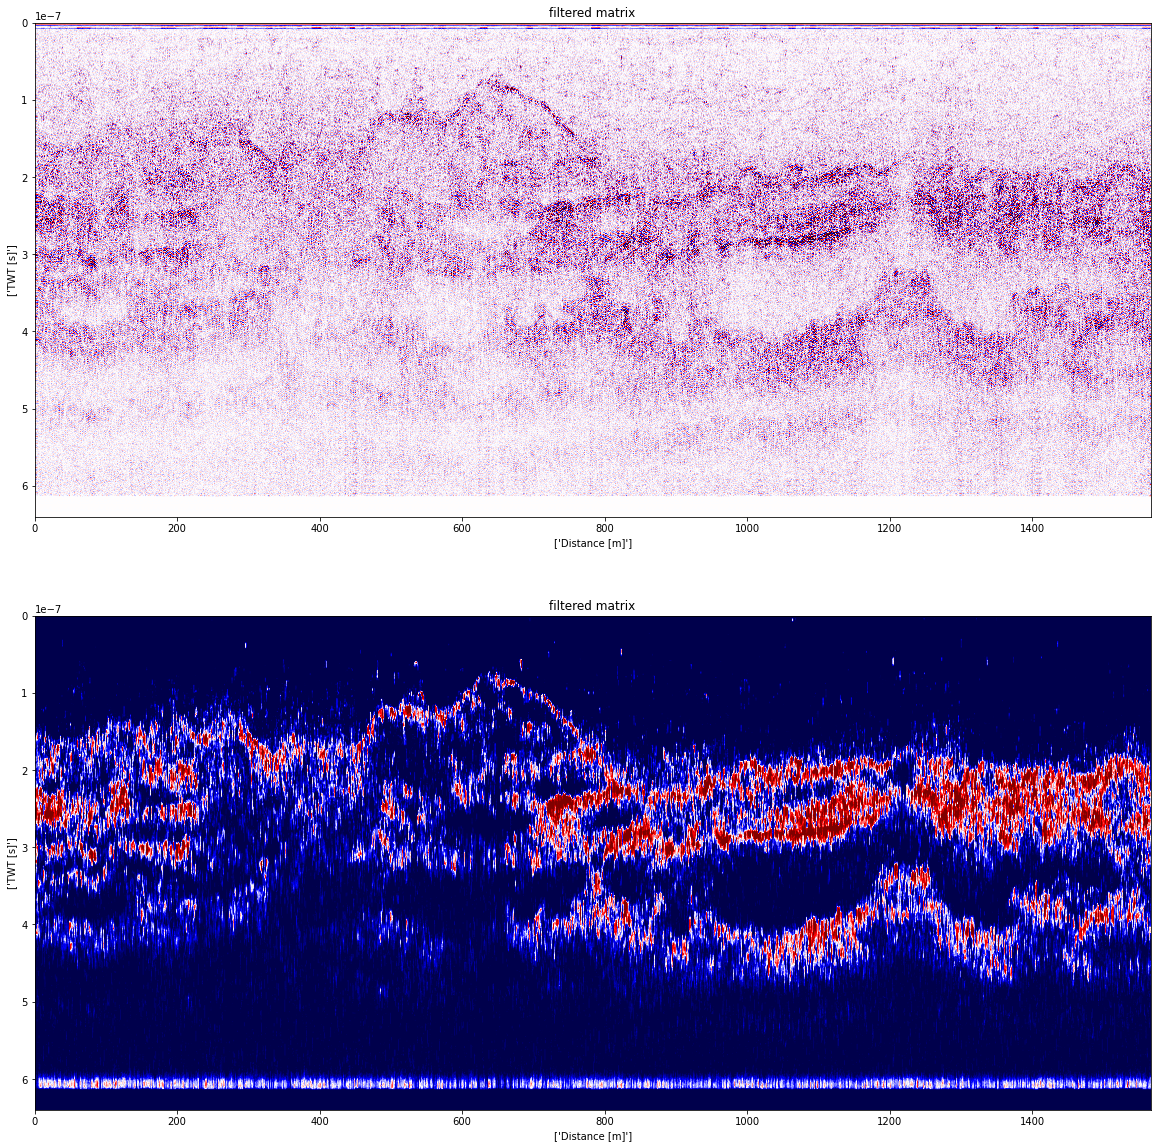

In [11]:
plt.figure(figsize=[20, 20])
plt.subplot(211)
plt.title('filtered matrix')
plt.imshow(data.T, cmap = 'seismic', aspect = 'auto', vmin = -0.1, vmax = 0.1, extent=[0, data.shape[0]*dx, data.shape[1]*dt, 0])
plt.xlabel(['Distance [m]'])
plt.ylabel(['TWT [s]'])
plt.subplot(212)
plt.title('filtered matrix')
plt.imshow(y_pred.T, cmap = 'seismic', aspect = 'auto', vmin = 0, vmax = 0.9, extent=[0, data.shape[0]*dx, data.shape[1]*dt, 0])
plt.xlabel(['Distance [m]'])
plt.ylabel(['TWT [s]'])